### Naive Bayes Classification using Scikit-learn

https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

In [195]:
# read dataset

import openpyxl
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

df = pd.read_excel("Soccer_Analytics_data-SD-Testing.xlsx", engine = 'openpyxl', usecols = [0,1,2,3])


# Import LabelEncoder
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

X =le.fit_transform(df['xGdif']) 
y= le.fit_transform(df['Result']) 

X = np.array(X).reshape((-1, 1))

#Features and label
X, y

(array([[0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [2],
        [0],
        [1],
        [0],
        [1],
        [2],
        [1],
        [1],
        [0],
        [1],
        [0],
        [2],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [2],
        [2],
        [2],
        [2],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [2],
        [0],
        [2],
        [2],
        [1],
        [1],
        [1],
        [0],
        [2],
        [2],
        [2],
        [2],
        [0],
        [1],
        [0],
        [0],
        [2],
        [1],
        [1],
        [2],
        [2],
        [0],
        [1],
        [0],
        [2],
        [1],
        [2],
        [1],
        [2],
        [2],
        [0],
        [0],
        [1],
        [0],
        [2],
        [1],
        [1],
        [0],
        [2],

In [196]:
# Use describe()
#df.describe()

#  GNB

In [197]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X,y)

GaussianNB()

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3)
#X_train

In [199]:
#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266, 1)
(266,)
(114, 1)
(114,)


In [200]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print(f'Accuracy of GNB classifier on training set: {gnb.score(X_train, y_train):.2f}')
print(f'Accuracy of GNB classifier on test set: {gnb.score(X_test, y_test):.2f}')

Accuracy of GNB classifier on training set: 0.49
Accuracy of GNB classifier on test set: 0.50


In [201]:
# Prediction with gnb algorithm - Use of 'predict' method

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

#y_pred_test

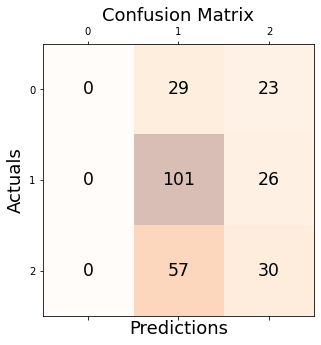

In [202]:
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

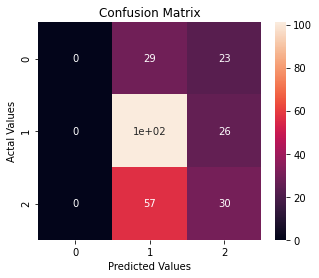

In [203]:

import seaborn as sns
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_train, y_pred_train)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2'], 
                     columns = ['0','1','2'])


#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [204]:
from sklearn.metrics import classification_report
#target_names = ['1','2','0']
print(classification_report(y_train, y_pred_train, labels=np.unique(y_pred_train)))

              precision    recall  f1-score   support

           1       0.54      0.80      0.64       127
           2       0.38      0.34      0.36        87

   micro avg       0.49      0.61      0.55       214
   macro avg       0.46      0.57      0.50       214
weighted avg       0.47      0.61      0.53       214



In [205]:
#k-Fold GNB


score_svm =cross_val_score(GaussianNB(), X, y,cv=3)
print(score_svm)
print('Avg :',np.average(score_svm))

[0.48818898 0.47244094 0.52380952]
Avg : 0.49481314835645546


# kNN

In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
#y_train.head()

In [207]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(f'Accuracy of K-NN classifier on training set: {knn.score(X_train, y_train):.2f}')
print(f'Accuracy of K-NN classifier on test set: {knn.score(X_test, y_test):.2f}')

Accuracy of K-NN classifier on training set: 0.27
Accuracy of K-NN classifier on test set: 0.25


In [208]:
# Prediction with knn algorithm - Use of 'predict' method

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

#y_pred_test

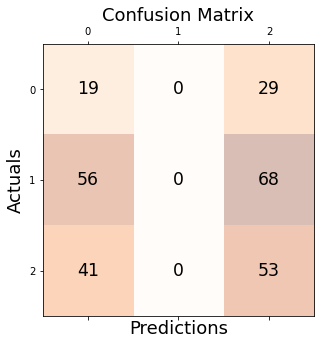

In [209]:
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [210]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train, labels=np.unique(y_pred_train)))

              precision    recall  f1-score   support

           0       0.16      0.40      0.23        48
           2       0.35      0.56      0.43        94

   micro avg       0.27      0.51      0.35       142
   macro avg       0.26      0.48      0.33       142
weighted avg       0.29      0.51      0.37       142



In [211]:
#k-Fold GNB


score_svm =cross_val_score(KNeighborsClassifier(), X, y,cv=3)
print(score_svm)
print('Avg :',np.average(score_svm))

[0.4488189  0.47244094 0.47619048]
Avg : 0.465816772903387


# SVM

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
#y_train.head()

In [213]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

print(f'Accuracy of SVM classifier on training set: {clf.score(X_train, y_train):.2f}')
print(f'Accuracy of SVM classifier on test set: {clf.score(X_test, y_test):.2f}')

Accuracy of SVM classifier on training set: 0.48
Accuracy of SVM classifier on test set: 0.52


In [214]:
#Predict the response for test dataset
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

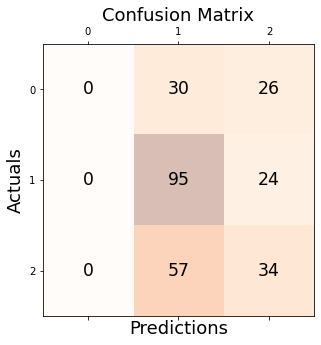

In [215]:
conf_matrix = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [216]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train, labels=np.unique(y_pred_train)))

              precision    recall  f1-score   support

           1       0.52      0.80      0.63       119
           2       0.40      0.37      0.39        91

   micro avg       0.48      0.61      0.54       210
   macro avg       0.46      0.59      0.51       210
weighted avg       0.47      0.61      0.53       210



In [217]:
#k-Fold SVM


score_svm =cross_val_score(svm.SVC(), X, y,cv=3)
print(score_svm)
print('Avg :',np.average(score_svm))

[0.48818898 0.47244094 0.52380952]
Avg : 0.49481314835645546
